
[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
# Wczytanie danych
data = pd.read_csv('cleaned_mbsa_onlycleanedtext.csv')

# Zamiana NaN na pusty ciąg znaków
data['text'] = data['text'].fillna('')

# Upewnienie się, że wszystkie wartości w kolumnie 'text' są typu string
data['text'] = data['text'].astype(str)

100%|██████████| 15803213/15803213 [21:49:14<00:00, 201.18it/s]   


Liczba angielskich komentarzy: 12602965
Najczęściej występujące języki:
language
en         12602965
es           414704
unknown      376798
fr           320068
tr           272369
pt           172926
ca           172713
vi           167507
it           152428
pl           128178
nl           116804
cy           102865
so           102272
de            96926
ro            90679
id            63871
hr            53722
cs            51151
tl            46845
af            38890
sv            37229
sl            36815
no            32343
fi            29943
da            28933
sw            19785
hu            15722
et            15301
sk            13258
sq            11119
lt            10674
lv             7410
Name: count, dtype: int64


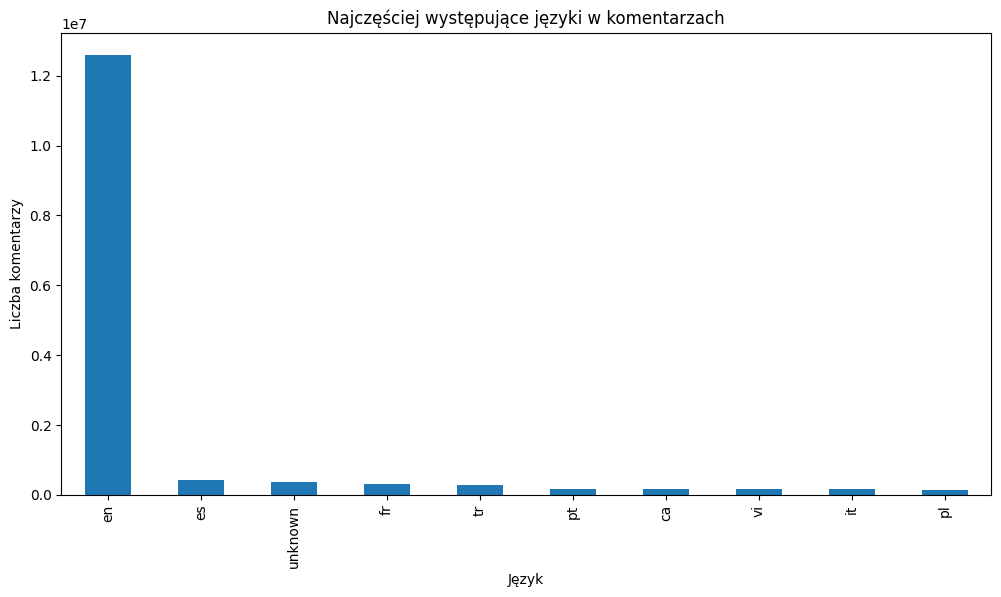

In [3]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from tqdm import tqdm
import matplotlib.pyplot as plt
tqdm.pandas()

# Zabezpieczenie dla powtarzalnych wyników
DetectorFactory.seed = 0

# Funkcja do wykrywania języka
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

# Dodanie kolumny z językiem
data['language'] = data['text'].progress_apply(detect_language)

# Zapisanie danych do pliku CSV
data.to_csv('data_with_languages.csv', index=False)

# Filtracja angielskich komentarzy
english_comments = data[data['language'] == 'en']

# Usunięcie kolumny 'language'
english_comments = english_comments.drop(columns=['language'])

# Sprawdzenie liczby angielskich komentarzy
print(f"Liczba angielskich komentarzy: {len(english_comments)}")

# Zapisanie do pliku CSV bez kolumny 'language'
english_comments.to_csv('english_comments.csv', index=False)

# Analiza występowania języków
language_counts = data['language'].value_counts()
print("Najczęściej występujące języki:")
print(language_counts)

# Wizualizacja rozkładu języków
plt.figure(figsize=(12, 6))
language_counts.head(10).plot(kind='bar', title='Najczęściej występujące języki w komentarzach')
plt.xlabel('Język')
plt.ylabel('Liczba komentarzy')
plt.show()

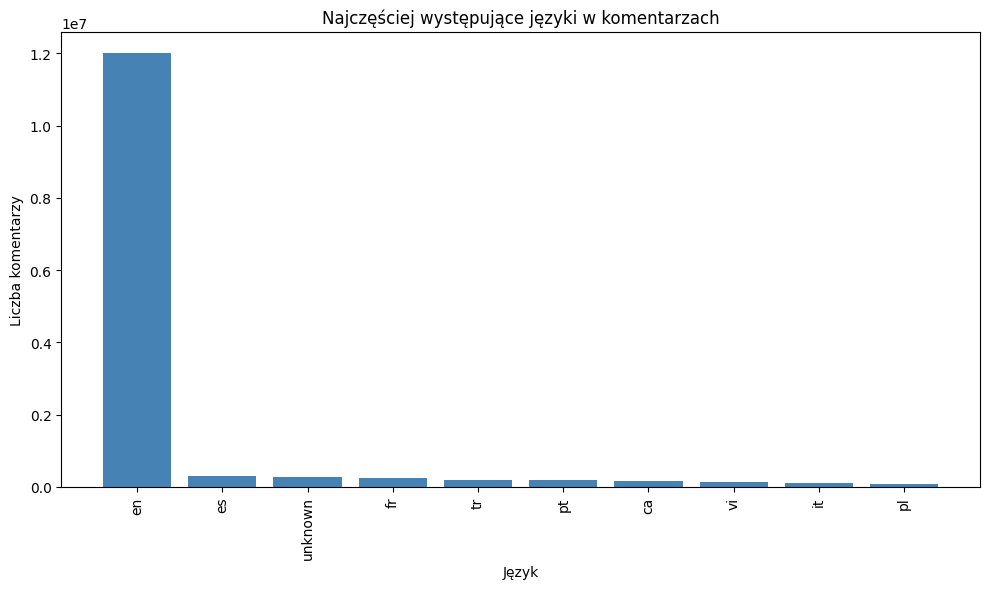

In [1]:
import matplotlib.pyplot as plt

# Przykładowe dane (dopasuj do własnych)
languages = ["en", "es", "unknown", "fr", "tr", "pt", "ca", "vi", "it", "pl"]
counts = [1.2e7, 3.0e5, 2.8e5, 2.5e5, 2.0e5, 1.8e5, 1.5e5, 1.3e5, 1.0e5, 0.8e5]

plt.figure(figsize=(10, 6), facecolor='white')   # Ustawienie białego tła całej figury
ax = plt.gca()
ax.set_facecolor('white')                       # Ustawienie białego tła obszaru z wykresem

plt.bar(languages, counts, color='steelblue')
plt.title("Najczęściej występujące języki w komentarzach")
plt.xlabel("Język")
plt.ylabel("Liczba komentarzy")

# Jeśli wartości na osi X nachodzą na siebie, można obrócić etykiety
plt.xticks(rotation=90)

# Opcjonalnie: usuń obramowanie spód-lewa, aby uzyskać minimalistyczny wygląd
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()